## Изучим зависимость % скидки от цены

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
df = pd.read_csv('clear_data.csv')

In [51]:
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,category_1,category_2,category_3
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59.0,4.0,1090,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25.0,4.1,4118,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28.0,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26.0,4.0,8031,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...",Home&Kitchen,"Heating,Cooling&AirQuality",Fans


In [5]:
df.dtypes[1:30]

product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
user_id                 object
category_1              object
category_2              object
category_3              object
dtype: object

In [52]:
df.describe()  #выведем описательную статистику

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096519,18270.596587
std,6944.304394,10874.826864,21.635905,0.291585,42729.981606
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


C:\Python\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


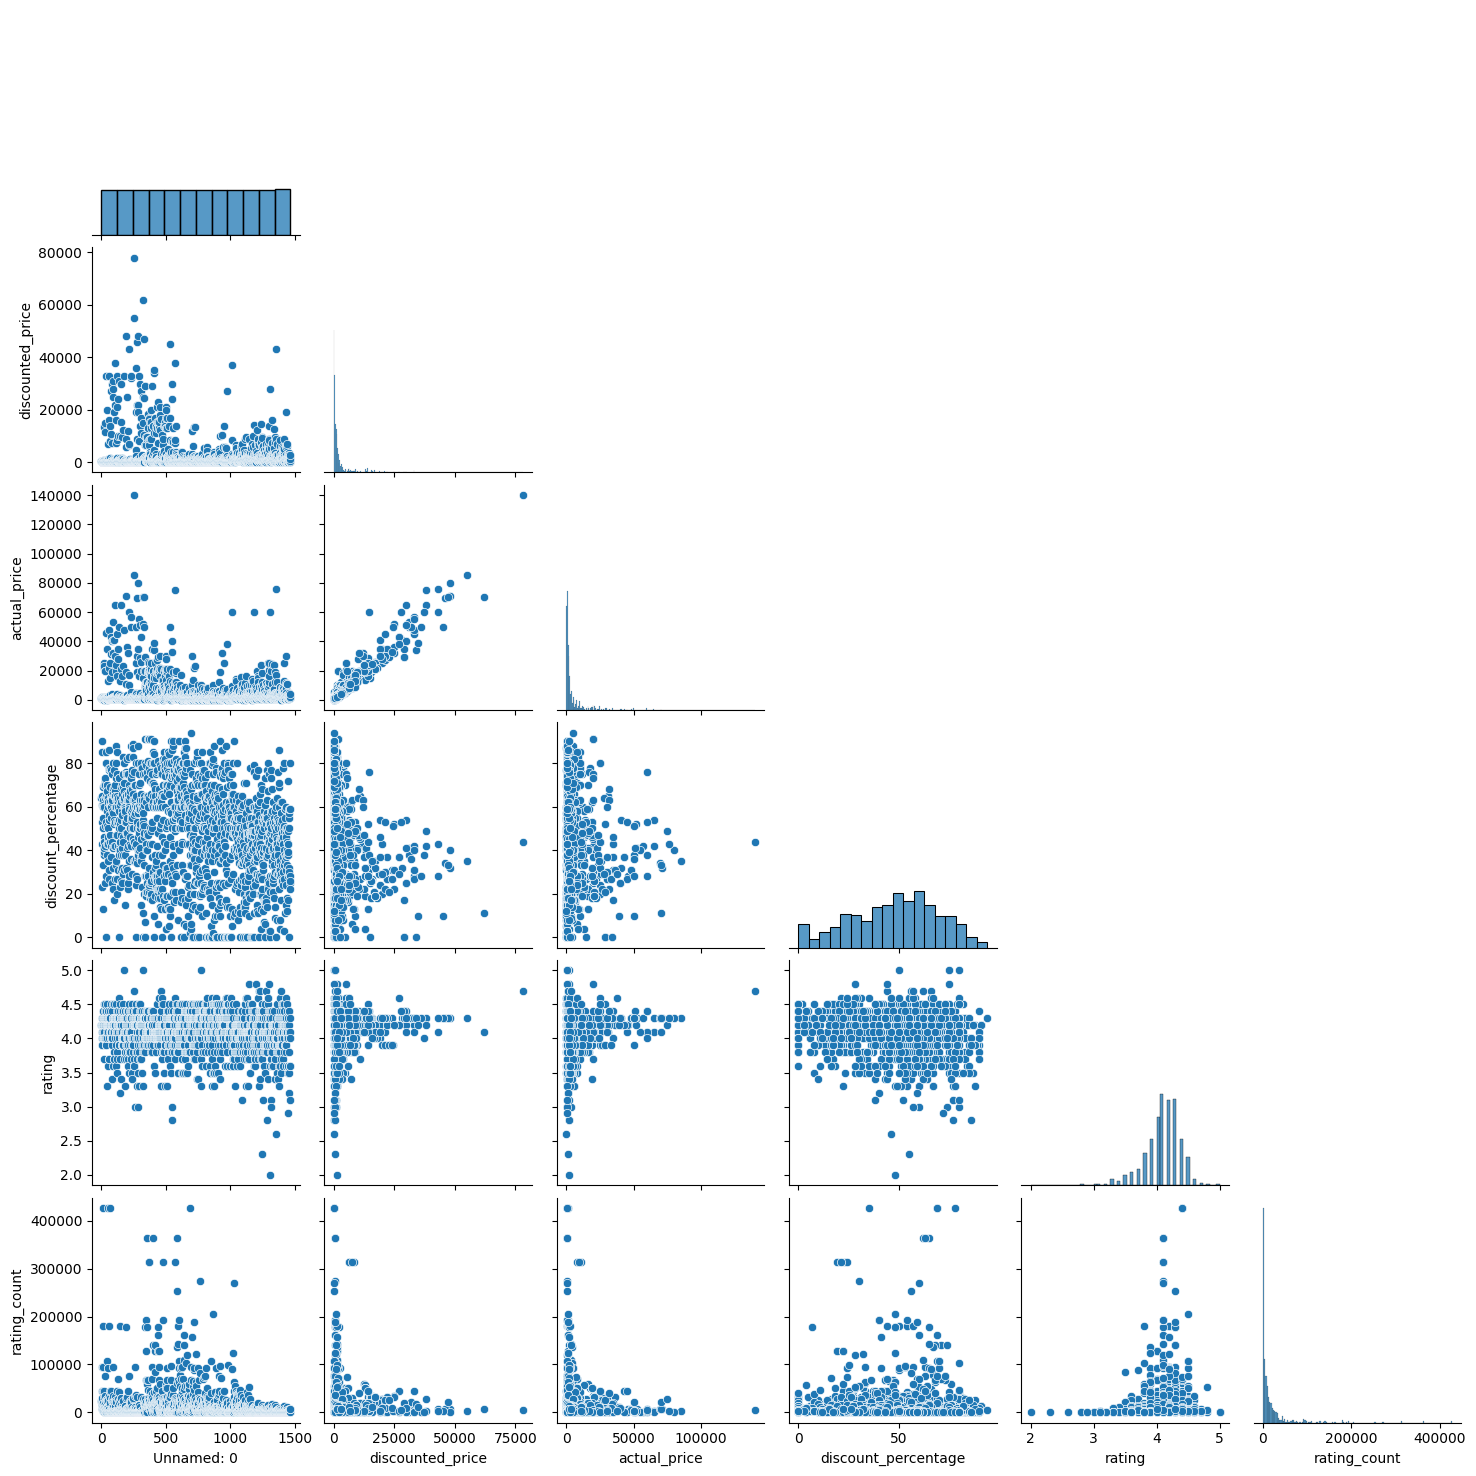

In [6]:
sns.pairplot(df, corner = True)

Для анализа берем пары с наиболее видимой корреляцией

In [11]:
df1 = df[(~df['discounted_price'].isna()) &  (~df['actual_price'].isna())  &  (~df['discount_percentage'].isna()) &  (~df['rating'].isna())&  (~df['rating_count'].isna())][['discounted_price', 'actual_price', 'discount_percentage','rating', 'rating_count']]
df1

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64.0,4.2,24269
1,199.0,349.0,43.0,4.0,43994
2,199.0,1899.0,90.0,3.9,7928
3,329.0,699.0,53.0,4.2,94363
4,154.0,399.0,61.0,4.2,16905
...,...,...,...,...,...
1460,379.0,919.0,59.0,4.0,1090
1461,2280.0,3045.0,25.0,4.1,4118
1462,2219.0,3080.0,28.0,3.6,468
1463,1399.0,1890.0,26.0,4.0,8031


C:\Python\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


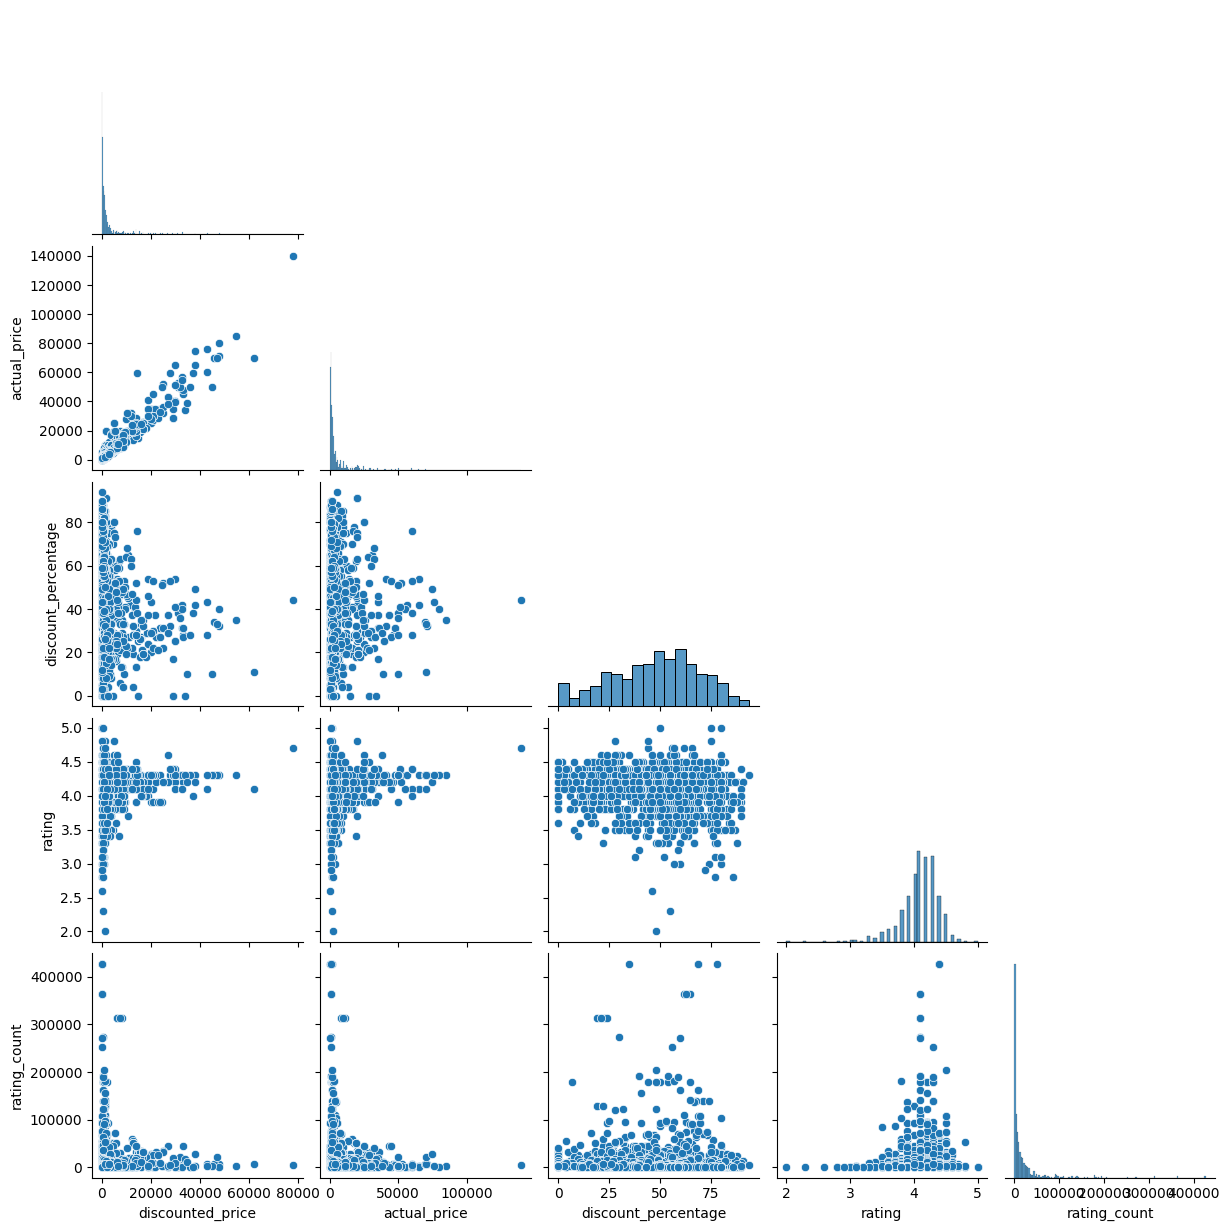

In [12]:
sns.pairplot(df1, corner=True)

In [13]:
df1.corr() #рассчитаем коэффициент корреляции

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120365,-0.027010
actual_price,0.961915,1.000000,-0.118098,0.121695,-0.035890
discount_percentage,-0.242412,-0.118098,1.000000,-0.154924,0.010869
rating,0.120365,0.121695,-0.154924,1.000000,0.101663
rating_count,-0.027010,-0.035890,0.010869,0.101663,1.000000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1465 non-null   float64
 1   actual_price         1465 non-null   float64
 2   discount_percentage  1465 non-null   float64
 3   rating               1465 non-null   float64
 4   rating_count         1465 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.4 KB


<Axes: >

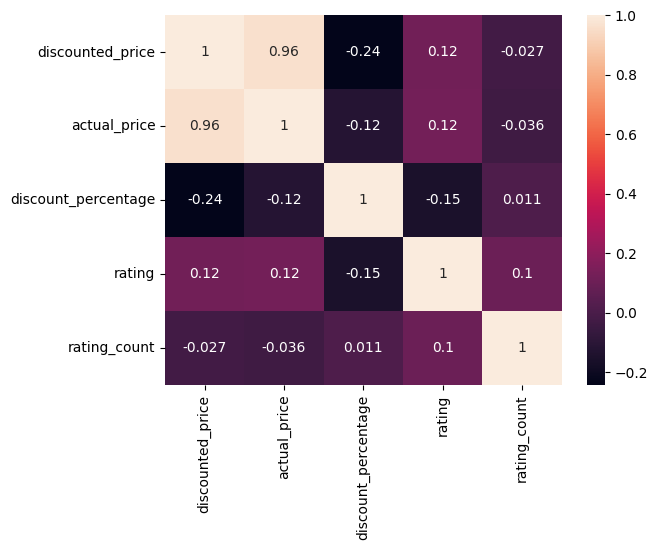

In [15]:
sns.heatmap(df1.corr(),  annot=True)

In [38]:
df2 = df1[['actual_price','discount_percentage']]
df2

,actual_price,discount_percentage
0,1099.0,64.0
1,349.0,43.0
2,1899.0,90.0
3,699.0,53.0
4,399.0,61.0
...,...,...
1460,919.0,59.0
1461,3045.0,25.0
1462,3080.0,28.0
1463,1890.0,26.0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
x = np.array([df2['actual_price']]).reshape((-1, 1))
x

array([[1099.],
       [ 349.],
       [1899.],
       ...,
       [3080.],
       [1890.],
       [3690.]])

In [39]:
y = df2['discount_percentage']

In [40]:
lm = LinearRegression()

In [41]:
model = lm.fit(x, y)

In [42]:
model.predict([[50000]]) #предсказание дисконтной ценф для 50000

array([37.22283181])

In [43]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 48.970821448141464
betas = [-0.00023496]


In [44]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.013947027744108942


In [45]:
import matplotlib.pyplot as plt

In [46]:
y_hat = model.predict(x)
y_hat

array([48.71260064, 48.88882048, 48.5246328 , ..., 48.24714529,
       48.52674744, 48.10381981])

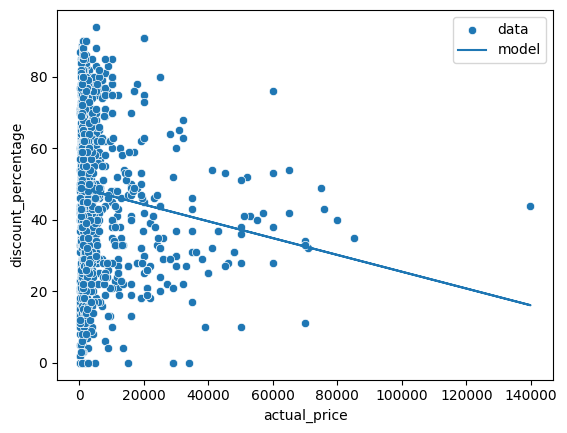

In [47]:
ax = sns.scatterplot(df2, x='actual_price', y='discount_percentage')
ax.plot(x,y_hat)
plt.legend(['data', 'model'])

In [31]:
df[df.actual_price<100]

,Unnamed: 0,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,category_1,category_2,category_3
616,616,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,50.0,50.0,0.0,4.3,5792,"AEVPRYZLGHNMEZA5BYGIX36LYZXA,AEZPOZQEEBFFXZ2EQ...",OfficeProducts,OfficePaperProducts,Paper
710,710,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,59.0,59.0,0.0,3.8,5958,"AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...",Computers&Accessories,Accessories&Peripherals,USBGadgets
783,783,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,89.0,99.0,10.0,4.2,241,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...",Computers&Accessories,Accessories&Peripherals,USBGadgets
808,808,B095X38CJS,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,99.0,99.0,0.0,4.3,388,"AG7MI6MZP3GMUTO65QNUR25VP7VA,AHBZCVGYU7BO7DCSN...",OfficeProducts,OfficePaperProducts,Paper
811,811,B00P93X2H6,Classmate Pulse Spiral Notebook - 240 mm x 180...,67.0,75.0,11.0,4.1,1269,"AH6NK74TCKWVMLPVFEC44ZLT546Q,AEUNLUIL7UEDSBOHD...",OfficeProducts,OfficePaperProducts,Paper
854,854,B00VA7YYUO,Apsara Platinum Pencils Value Pack - Pack of 20,99.0,99.0,0.0,4.3,5036,"AETT3TJOC4QSORCIDNNMRWXFQBJA,AEKSSQBYFN4PVMF6T...",Home&Kitchen,CraftMaterials,DrawingMaterials
975,975,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.0,39.0,0.0,3.8,3344,"AEEH5DFNKICJXQME6UXNS3P3OM3A,AGBSAL7DSIA2DOH4O...",Computers&Accessories,Accessories&Peripherals,USBGadgets
997,997,B00URH5E34,Inventis 5V 1.2W Portable Flexible USB LED Lig...,39.0,39.0,0.0,3.6,13572,"AGA4V2SLJ744MITK2FWWGPXOFB7A,AHDOHVS266NLKERWU...",Computers&Accessories,Accessories&Peripherals,USBGadgets
1094,1094,B08F47T4X5,VR 18 Pcs - 3 Different Size Plastic Food Snac...,89.0,89.0,0.0,4.2,19621,"AEWWWALRID3B4CQQK7PMSARCRM7Q,AF2QBWT5Z74JZHE3S...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances
1165,1165,B0B4PPD89B,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,79.0,79.0,0.0,4.0,97,"AHO6AWGPNKTSTMNPWGZB4WHA2U2Q,AHVONN4NTBA3GJ36P...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances


<Axes: >

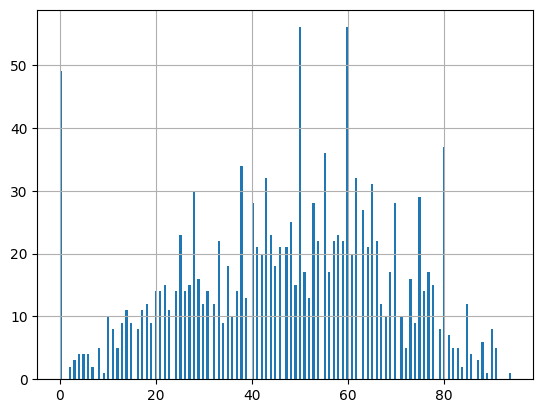

In [32]:
df.discount_percentage  .hist(bins = 200)